# Experiment visualizations

## Contents

1. [Set-up](#Set-up)
1. [Basic equality](#Basic-equality)
  1. [Basic equality: No pretraining](#Basic-equality:-No-pretraining)
  1. [Basic equality: With pretraining](#Basic-equality:-With-pretraining)
  1. [Basic equality: Compare with and without pretraining](#Basic-equality:-Compare-with-and-without-pretraining)
1. [Flat Premack](#Flat-Premack)
  1. [Flat Premack: One hidden layer, no pretraining](#Flat-Premack:-One-hidden-layer,-no-pretraining)
  1. [Flat Premack: Two hidden layers, no pretraining](#Flat-Premack:-Two-hidden-layers,-no-pretraining)
  1. [Flat Premack: Two hidden layers, with pretraining](#Flat-Premack:-Two-hidden-layers,-with-pretraining)
  1. [Flat Premack: Compare with and without pretraining](#Flat-Premack:-Compare-with-and-without-pretraining)
1. [Inputs as outputs](#Inputs-as-outputs)
  1. [Inputs as outputs: No pretraining](#Inputs-as-outputs:-No-pretraining)
  1. [Inputs as outputs: Zero-shot setting](#Inputs-as-outputs:-Zero-shot-setting)
  1. [Inputs as outputs: With pretraining](#Inputs-as-outputs:-With-pretraining)
  1. [Inputs as outputs: Compare with and without pretraining](#Inputs-as-outputs:-Compare-with-and-without-pretraining)
1. [Fuzzy Pattern LMs](#Fuzzy-Pattern-LMs)
  1. [Fuzzy Pattern LMs: No pretraining](#Fuzzy-Pattern-LMs:-No-pretraining)
  1. [Fuzzy Pattern LMs: With pretraining](#Fuzzy-Pattern-LMs:-With-pretraining)
  1. [Fuzzy Pattern LMs: Compare with and without pretraining](#Fuzzy-Pattern-LMs:-Compare-with-and-without-pretraining)
1. [Small pretraining examples for the paper](#Small-pretraining-examples-for-the-paper)

## Set-up

In [1]:
from comparative_viz import ComparativeViz
from comparative_viz import compare_with_and_without_pretraining_viz
from comparative_viz import input_as_output_zero_shot_viz
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import pandas as pd
import re
from torch_rep_learner import RepLearner
import utils

In [2]:
utils.fix_random_seeds()

## Basic equality

### Basic equality: No pretraining

KeyboardInterrupt: 

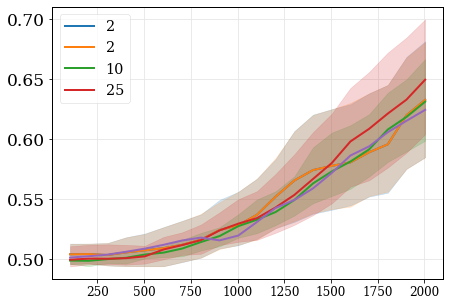

In [3]:
ComparativeViz("equality.csv").create_all()

### Basic equality: With pretraining

In [ ]:
ComparativeViz("equality-pretrain-3tasks.csv").create_all()

In [ ]:
ComparativeViz("equality-pretrain-5tasks.csv").create_all()

In [ ]:
ComparativeViz("equality-pretrain-10tasks.csv").create_all()

### Basic equality: Compare with and without pretraining

In [ ]:
compare_with_and_without_pretraining_viz(
    nopretrain_base_filename="equality.csv",
    pretrain_base_filenames=(
        "equality-pretrain-3tasks.csv",
        "equality-pretrain-5tasks.csv",
        "equality-pretrain-10tasks.csv"
    ),
    embed_dim=10,
    hidden_dim=100,
    nopretrain_color=utils.STYLE_COLORS[1],
    experiment_type="equality-pretrain-compare")

## Flat Premack

### Flat Premack: One hidden layer, no pretraining

In [ ]:
ComparativeViz("flatpremack-h1.csv").create_all()

### Flat Premack: Two hidden layers, no pretraining

In [ ]:
ComparativeViz("flatpremack-h2.csv").create_all()

### Flat Premack: Two hidden layers, with pretraining

In [ ]:
ComparativeViz("flatpremack-h2-pretrain-3tasks.csv").create_all()

In [ ]:
ComparativeViz("flatpremack-h2-pretrain-5tasks.csv").create_all()

In [ ]:
ComparativeViz("flatpremack-h2-pretrain-10tasks.csv").create_all()

### Flat Premack: Compare with and without pretraining

In [ ]:
compare_with_and_without_pretraining_viz(
    nopretrain_base_filename="flatpremack-h2.csv",
    pretrain_base_filenames=(
        "flatpremack-h2-pretrain-3tasks.csv",
        "flatpremack-h2-pretrain-5tasks.csv",
        "flatpremack-h2-pretrain-10tasks.csv"
    ),
    embed_dim=10,
    hidden_dim=100,
    experiment_type="flatpremack-h2-pretrain-compare",  
    nopretrain_color=utils.STYLE_COLORS[1],
    legend_placement="lower right",
    train_size_max=35000)

## Inputs as outputs

In [ ]:
io_kwargs = {
    "xlabel": "Additional hierarchical Premack training examples",
    "max_cols_method": "smallest"}

### Inputs as outputs: No pretraining

In [ ]:
ComparativeViz("input-as-output.csv", **io_kwargs).create_all()

### Inputs as outputs: Zero-shot setting

In [ ]:
input_as_output_zero_shot_viz("input-as-output.csv")

### Inputs as outputs: With pretraining

In [ ]:
ComparativeViz("input-as-output-pretrain-3tasks.csv", **io_kwargs).create_all()

In [ ]:
ComparativeViz("input-as-output-pretrain-5tasks.csv", **io_kwargs).create_all()

In [ ]:
ComparativeViz("input-as-output-pretrain-10tasks.csv", **io_kwargs).create_all()

### Inputs as outputs: Compare with and without pretraining

In [ ]:
compare_with_and_without_pretraining_viz(
    nopretrain_base_filename="input-as-output.csv",
    pretrain_base_filenames=(
        "input-as-output-pretrain-3tasks.csv",   
        "input-as-output-pretrain-5tasks.csv",
        "input-as-output-pretrain-10tasks.csv"
    ),
    embed_dim=25,
    hidden_dim=None,
    nopretrain_color=utils.STYLE_COLORS[2],
    experiment_type="input-as-output-pretrain-compare",    
    legend_placement="lower right",
    **io_kwargs)

## Fuzzy Pattern LMs

In [ ]:
lm_ylim = [0, 1.01]

### Fuzzy Pattern LMs: No pretraining

In [ ]:
ComparativeViz("fuzzy-lm-vocab20.csv", ylim=lm_ylim).create_all()

### Fuzzy Pattern LMs: With pretraining

In [ ]:
ComparativeViz("fuzzy-lm-vocab20-pretrain-3tasks.csv", ylim=lm_ylim).create_all()

In [ ]:
ComparativeViz("fuzzy-lm-vocab20-pretrain-5tasks.csv", ylim=lm_ylim).create_all()

In [ ]:
ComparativeViz("fuzzy-lm-vocab20-pretrain-10tasks.csv", ylim=lm_ylim).create_all()

### Fuzzy Pattern LMs: Compare with and without pretraining

In [ ]:
compare_with_and_without_pretraining_viz(
    nopretrain_base_filename="fuzzy-lm-vocab20.csv",
    pretrain_base_filenames=(
        "fuzzy-lm-vocab20-pretrain-3tasks.csv",
        "fuzzy-lm-vocab20-pretrain-5tasks.csv",
        "fuzzy-lm-vocab20-pretrain-10tasks.csv"
    ),
    embed_dim=2,
    hidden_dim=100,
    nopretrain_color=utils.STYLE_COLORS[0],
    experiment_type="fuzzy-lm-pretrain-compare", 
    ylim=lm_ylim,
    legend_placement="lower right")

## Small pretraining examples for the paper

In [45]:
def toy_examples_for_figure(n_tasks=3, vocab_size=8, embed_dim=2):
    X = list(range(vocab_size))
    
    ys = []
    y = [0,1,0,1,0,1,0,1]
    ys.append(y)
    y = [3,3,4,4,5,5,6,6]
    ys.append(y)
    ys = list(zip(*ys))
    print(ys)
    
    embedding = np.array([utils.randvec(embed_dim) for _ in range(vocab_size)])
    
    mod = RepLearner(
        vocab_size,
        embed_dim=embed_dim,
        embedding=embedding,
        hidden_dim=2,
        n_tasks=2,
        output_dims = [2,1],
        max_iter=5000)
    
    original_embedding = mod.embedding.copy()
    
    mod.fit(X, ys)
    print(mod.predict(X))
    
    updated_embedding = mod.embedding.copy()
    
    return original_embedding, updated_embedding, ys

In [46]:
def format_toy_matrix(X, n_rows=6):
    df = pd.DataFrame(X)
    df.columns = [f"d_{{{i}}}" for i in range(1, X.shape[1]+1)]
    return df.head(n_rows).round(1).to_latex(escape=False, index=None)

In [47]:
def visualize_matrix(X, ys, figsize=(3, 3), output_filename=None):
    df = pd.DataFrame(X)
    vocab = df.index
    label_combos = {tuple(x) for x in ys}
    lookup = dict(zip(label_combos, utils.STYLE_COLORS))
    colors = [lookup[tuple(x)] for x in ys]
    for i in range(len(colors)):
        color ={0:"red", 1:"blue"}[ys[i][0]]
        sides =ys[i][1]
        line = "\\node[regular polygon,regular polygon sides={}, fill={}!100] at (axis cs:{}, {}) {{}};".format(str(int(sides)),color, str(X[i][0]), str(X[i][1]))
        print(line)
    xvals = [b[0] for b in X]
    yvals = [b[1] for b in X]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    ax.plot(xvals, yvals, marker='', linestyle='')
    if True:
        # Text labels:
        for word, x, y, color in zip(vocab, xvals, yvals, colors):
            try:
                ax.annotate(word, (x, y), fontsize=8, color=color)
            except UnicodeDecodeError:  ## Python 2 won't cooperate!
                pass
    else:
        for x, y, color in zip(xvals, yvals, colors):
            ax.plot(x, y, marker='.', color=color)
    plt.xticks([-2,-1,0,1,2])
    plt.yticks([-2,-1,0,1,2])
    # Output:
    if output_filename:
        plt.savefig(output_filename, bbox_inches='tight')
    else:
        plt.show()
    #utils.tsne_viz(
    #    df, 
    #    colors=colors, 
    #    use_names=True, 
    #    output_filename=output_filename, 
    #    figsize=figsize,
    #    random_state=42)

In [48]:
original_embedding, updated_embedding, ys  = toy_examples_for_figure()

[(0, 3), (1, 3), (0, 4), (1, 4), (0, 5), (1, 5), (0, 6), (1, 6)]


Pretraining - finished epoch 5000 of 5000; error is 3.5590012430475326e-06

[array([0, 1, 0, 1, 0, 1, 0, 1], dtype=int64), tensor([[3.0003],
        [3.0004],
        [4.0000],
        [4.0000],
        [5.0000],
        [5.0000],
        [6.0000],
        [5.9999]]), tensor([0, 0, 0, 0, 0, 0, 0, 0])]


\node[regular polygon,regular polygon sides=3, fill=red!100] at (axis cs:-0.46076292, -0.25607586) {};
\node[regular polygon,regular polygon sides=3, fill=blue!100] at (axis cs:-0.34067187, -0.41851202) {};
\node[regular polygon,regular polygon sides=4, fill=red!100] at (axis cs:0.09563561, 0.32939786) {};
\node[regular polygon,regular polygon sides=4, fill=blue!100] at (axis cs:-0.43213332, -0.08778201) {};
\node[regular polygon,regular polygon sides=5, fill=red!100] at (axis cs:0.08345886, -0.47464737) {};
\node[regular polygon,regular polygon sides=5, fill=blue!100] at (axis cs:0.3369436, 0.28341505) {};
\node[regular polygon,regular polygon sides=6, fill=red!100] at (axis cs:-0.0976298, -0.32900867) {};
\node[regular polygon,regular polygon sides=6, fill=blue!100] at (axis cs:0.21705168, -0.34210852) {};


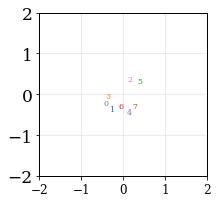

In [49]:
visualize_matrix(
    original_embedding, ys, 
    output_filename=os.path.join("fig", "toy-example-original.pdf"))

\node[regular polygon,regular polygon sides=3, fill=red!100] at (axis cs:0.52931935, -0.85952175) {};
\node[regular polygon,regular polygon sides=3, fill=blue!100] at (axis cs:-1.058038, -0.3238428) {};
\node[regular polygon,regular polygon sides=4, fill=red!100] at (axis cs:1.3002914, -0.79191846) {};
\node[regular polygon,regular polygon sides=4, fill=blue!100] at (axis cs:-1.1480407, 0.44475743) {};
\node[regular polygon,regular polygon sides=5, fill=red!100] at (axis cs:1.3321345, -1.707287) {};
\node[regular polygon,regular polygon sides=5, fill=blue!100] at (axis cs:-1.0871506, 1.4478576) {};
\node[regular polygon,regular polygon sides=6, fill=red!100] at (axis cs:1.784022, -2.0642083) {};
\node[regular polygon,regular polygon sides=6, fill=blue!100] at (axis cs:-1.6676613, 1.4557308) {};


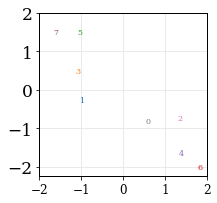

In [50]:
visualize_matrix(
    updated_embedding, ys, 
    output_filename=os.path.join("fig", "toy-example-trained.pdf"))

In [8]:
print(format_toy_matrix(original_embedding))

\begin{tabular}{rr}
\toprule
 d_{1} &  d_{2} \\
\midrule
  -0.4 &    0.2 \\
   0.1 &   -0.2 \\
  -0.4 &   -0.0 \\
   0.1 &    0.0 \\
   0.5 &    0.2 \\
   0.3 &   -0.4 \\
\bottomrule
\end{tabular}



In [11]:
print(format_toy_matrix(updated_embedding))

\begin{tabular}{rr}
\toprule
 d_{1} &  d_{2} \\
\midrule
  -1.3 &    0.4 \\
  -0.1 &   -1.1 \\
  -0.9 &    1.2 \\
   0.6 &   -0.6 \\
  -0.9 &    2.1 \\
   1.2 &   -0.1 \\
\bottomrule
\end{tabular}

